In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from librosa.core import istft
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [28]:
import speech_recognition as sr 
  
import os 
  
from pydub import AudioSegment 
from pydub.silence import split_on_silence 
  
# a function that splits the audio file into chunks 
# and applies speech recognition 
def silence_based_conversion(path = "alice-medium.wav"): 
  
    # open the audio file stored in 
    # the local system as a wav file. 
    song = AudioSegment.from_wav(path) 
  
    # open a file where we will concatenate   
    # and store the recognized text 
    fh = open("recognized.txt", "w+") 
          
    # split track where silence is 0.5 seconds  
    # or more and get chunks 
    chunks = split_on_silence(song, 
        # must be silent for at least 0.5 seconds 
        # or 500 ms. adjust this value based on user 
        # requirement. if the speaker stays silent for  
        # longer, increase this value. else, decrease it. 
                              
        # consider it silent if quieter than -16 dBFS 
        # adjust this per requirement 
        silence_thresh = -35,keep_silence=1000
    ) 
  
    # create a directory to store the audio chunks. 
    try: 
        os.mkdir('audio_chunks') 
    except(FileExistsError): 
        pass
  
    # move into the directory to 
    # store the audio files. 
    os.chdir('audio_chunks') 
  
    i = 0
    # process each chunk 
    for chunk in chunks: 
        
        # Create 0.5 seconds silence chunk 
        chunk_silent = AudioSegment.silent(duration = 1000) 
  
        # add 0.5 sec silence to beginning and  
        # end of audio chunk. This is done so that 
        # it doesn't seem abruptly sliced.
        print(chunk)
        audio_chunk =  chunk 
  
        # export audio chunk and save it in  
        # the current directory. 
        print("saving chunk{0}.wav".format(i)) 
        # specify the bitrate to be 192 k 
        audio_chunk.export("./chunk{0}.wav".format(i), bitrate ='192k', format ="wav") 
  
        # the name of the newly created chunk 
        filename = 'chunk'+str(i)+'.wav'
  
        print("Processing chunk "+str(i)) 
  
        # get the name of the newly created chunk 
        # in the AUDIO_FILE variable for later use. 
        file = filename 
  
        # create a speech recognition object 
        r = sr.Recognizer() 
  
        # recognize the chunk 
        with sr.AudioFile(file) as source: 
            # remove this if it is not working 
            # correctly. 
            r.adjust_for_ambient_noise(source) 
            audio_listened = r.listen(source) 
  
        try: 
            # try converting it to text 
            rec = r.recognize_google(audio_listened) 
            # write the output to the file. 
            fh.write(rec+". ") 
  
        # catch any errors. 
        except sr.UnknownValueError: 
            print("Could not understand audio") 
  
        except sr.RequestError as e: 
            print("Could not request results. check your internet connection") 
  
        i += 1
  
    os.chdir('..') 
  
  
if __name__ == '__main__': 
          
    print('Enter the audio file path') 
  
    path = "C:\\Users\\DELL\\Desktop\\test1.wav"
  
    silence_based_conversion(path) 

Enter the audio file path
saving chunk0.wav
Processing chunk 0
Could not understand audio


In [27]:
from pydub import AudioSegment

wav_audio = AudioSegment.from_file("C:\\Users\\DELL\\Desktop\\.MP3", format="MP3")
#raw_audio = AudioSegment.from_file("audio.wav", format="raw",
#                                  frame_rate=44100, channels=2, sample_width=2)

wav_audio.export("C:\\Users\\DELL\\Desktop\\test1.wav", format="wav")
#raw_audio.export("audio2.mp3", format="mp3")

<_io.BufferedRandom name='C:\\Users\\DELL\\Desktop\\test1.wav'>

In [ ]:
C:\Users\DELL\Desktop\final junior\audio_chunks

In [25]:
#DataFlair - Load the data and extract features for each sound file
def load_data1(test_size=0.2):
    x,y=[],[]
    file_name=os.path.basename("C:\\Users\\DELL\\Desktop\\test1.Wav")
    feature=extract_feature(file_name,mfcc=True, chroma=True, mel=True)
    return np.array(feature)

In [2]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.core.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [3]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'}
observed_emotions=['neutral', 'happy', 'fearful', 'sad','angry']

In [4]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\DELL\\Desktop\\jonuior project\\vo\\*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        if emotion not in observed_emotions:
            continue
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.1)


In [6]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate='adaptive', max_iter=10000)

In [7]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(600,),
              learning_rate='adaptive', max_iter=10000)

In [ ]:
y_pred=model.predict(load_data1())

In [47]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 86.75%


In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_predict = clf.predict(x_test)


In [50]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_predict)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 71.08%


In [51]:
svs_m=SVC(max_iter=1000)

In [52]:
svs_m.fit(x_train,y_train)

SVC(max_iter=1000)

In [53]:
yy=svs_m.predict(x_test)

In [54]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=yy)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 53.01%


In [55]:
a_train=list()
for i in range(x_train.shape[0]):
    arr_2d = np.reshape(x_train[i],(6,30))
    a_train.append(arr_2d)
    
a_train= np.array(a_train)

In [56]:
a_test=list()

for i in range(x_test.shape[0]):
    arr_2d = np.reshape(x_test[i],(6,30))
    a_test.append(arr_2d)
a_test= np.array(a_test)

In [63]:
input_shape = (a_train.shape[1],a_train.shape[2],1)
a_train = a_train.reshape(a_train.shape[0], a_train.shape[1], a_train.shape[2], 1)
print(a_train.shape)
a_test = a_test.reshape(a_test.shape[0], a_test.shape[1], a_test.shape[2], 1)
print(a_test.shape)

(744, 6, 30, 1)
(83, 6, 30, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(y_train)

label_encoded = label_encoded[:, np.newaxis]
print(label_encoded)

one_hot_encoder = OneHotEncoder(sparse=False)
ay_train = one_hot_encoder.fit_transform(label_encoded)
ay_train

In [ ]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(y_test)

label_encoded = label_encoded[:, np.newaxis]
print(label_encoded)

one_hot_encoder = OneHotEncoder(sparse=False)
ay_test = one_hot_encoder.fit_transform(label_encoded)
ay_test

In [81]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [82]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 6, 30, 16)         160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 30, 32)         4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 15, 32)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 15, 32)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               184448    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)              

In [90]:
history=model.fit(a_train, ay_train, epochs=100, verbose=1, validation_data=(a_test, ay_test))

Epoch 1/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0688 - accuracy: 0.9745 - val_loss: 0.3440 - val_accuracy: 0.9277
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0604 - accuracy: 0.9825 - val_loss: 0.3281 - val_accuracy: 0.9277
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0981 - accuracy: 0.9731 - val_loss: 0.3019 - val_accuracy: 0.9398
Epoch 4/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0561 - accuracy: 0.9839 - val_loss: 0.2587 - val_accuracy: 0.9398
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0795 - accuracy: 0.9677 - val_loss: 0.3104 - val_accuracy: 0.9277
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0515 - accuracy: 0.9866 - val_loss: 0.2526 - val_accuracy: 0.9398
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0709 - accuracy: 0.9879 - val_loss: 0.3233 - val_accuracy: 0.9157
Epoch 

24/24 [==============================] - 0s 10ms/step - loss: 0.0412 - accuracy: 0.9879 - val_loss: 0.2890 - val_accuracy: 0.9398
Epoch 59/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.3584 - val_accuracy: 0.9398
Epoch 60/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.3769 - val_accuracy: 0.9398
Epoch 61/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0300 - accuracy: 0.9946 - val_loss: 0.4713 - val_accuracy: 0.9277
Epoch 62/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0318 - accuracy: 0.9879 - val_loss: 0.4443 - val_accuracy: 0.9398
Epoch 63/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0512 - accuracy: 0.9879 - val_loss: 0.3225 - val_accuracy: 0.9277
Epoch 64/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0568 - accuracy: 0.9772 - val_loss: 0.4403 - val_accuracy: 0.9277
Epoch 65/100

In [117]:
predictions = model.predict(a_test)
predictions

array([[1.00000000e+00, 1.18124222e-08, 7.53222068e-11, 2.01155634e-17,
        7.03035923e-14],
       [1.00000000e+00, 1.16622527e-19, 3.88059425e-21, 2.55233516e-36,
        2.57006010e-27],
       [3.52973817e-04, 1.23441523e-05, 2.04360276e-07, 9.99441326e-01,
        1.93168162e-04],
       [9.99385476e-01, 6.03454770e-04, 7.86714918e-06, 2.52202792e-08,
        3.16217347e-06],
       [3.35842021e-10, 1.36678923e-11, 4.25276710e-14, 9.99990940e-01,
        9.08056245e-06],
       [1.04119813e-09, 9.99998093e-01, 9.40853038e-12, 2.52219117e-13,
        1.95511529e-06],
       [8.66195536e-04, 9.55379784e-01, 3.45357752e-04, 4.11615765e-04,
        4.29971106e-02],
       [5.48597455e-01, 2.89102525e-01, 2.11630818e-02, 8.31424259e-03,
        1.32822737e-01],
       [1.82375723e-15, 2.92038678e-08, 1.68891194e-18, 4.02832325e-12,
        1.00000000e+00],
       [6.53816194e-13, 6.22120924e-16, 4.84879161e-19, 1.00000000e+00,
        1.82427158e-08],
       [6.05977675e-07, 9.8784

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('loss:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
print('accuracy:', history.history['accuracy'][-1])
print('val_acc:', history.history['val_acc'][-1])
plt.show()

In [118]:
 from sklearn.metrics import confusion_matrix

In [ ]:
predictions = np.argmax(predictions, axis=1)
ay_test = one_hot_encoder.inverse_transform(ay_test)

In [121]:
import seaborn as sns

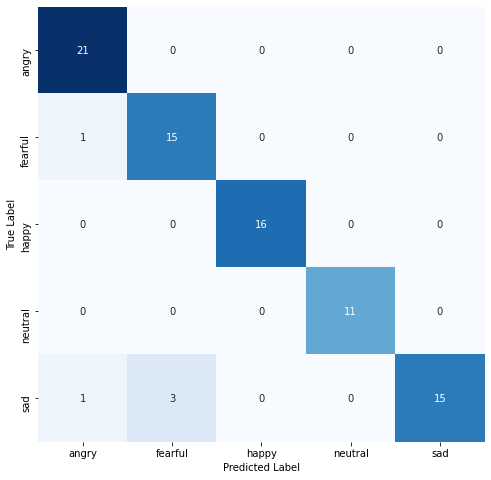

In [122]:
cm = confusion_matrix(ay_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()